<a href="https://colab.research.google.com/github/AliAffan88/REGRESSION_using_Keras-Tensorflow/blob/main/Assignment_1_Regression_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESSION using DL Library Keras/Tensorflow

1.   List item
2.   List item



### Week 4 Assignment.


This is Concrete Strength Prediction dataset. You would be required to follow the instructions below to make a regression model to measure the concrete strength.
For test purpose, use 10% of data as test.

### Dated: 16.10.2023

#### Setting up Libraries

In [ ]:
#imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


#### Loading Data

In [ ]:
concrete_data = pd.read_csv("https://cocl.us/concrete_data")

#### Getting basic info and feel of the data

In [ ]:
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
#get data feel using pandas methods of describe/info
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [ ]:
concrete_data.drop_duplicates(inplace=True)

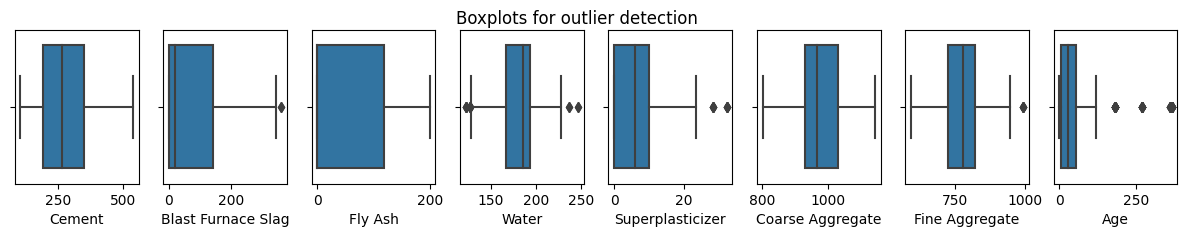

In [ ]:
fig, axes = plt.subplots(1, 8, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(x=concrete_data['Cement'], ax=axes[0])
sns.boxplot(x=concrete_data['Blast Furnace Slag'], ax=axes[1])
sns.boxplot(x=concrete_data['Fly Ash'], ax=axes[2])
sns.boxplot(x=concrete_data['Water'], ax=axes[3])
sns.boxplot(x=concrete_data['Superplasticizer'], ax=axes[4])
sns.boxplot(x=concrete_data['Coarse Aggregate'], ax=axes[5])
sns.boxplot(x=concrete_data['Fine Aggregate'], ax=axes[6])
sns.boxplot(x=concrete_data['Age'], ax=axes[7])
plt.show()

In [ ]:
def outlier_imputer(columns,Inter_QR):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in columns:
        # Reassign minimum to zero
        concrete_data.loc[concrete_data[col]<0, col]

        # Calculate upper threshold
        q1 = concrete_data[col].quantile(0.25)
        q3 = concrete_data[col].quantile(0.75)
        IQR = q3 - q1
        upper_threshold = q3 + (Inter_QR * IQR)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)


        # Reassign values > threshold to threshold
        concrete_data.loc[concrete_data[col] > upper_threshold, col] = upper_threshold
        print(concrete_data[col].describe().T)
        print()

In [ ]:
outlier_imputer(['Blast Furnace Slag'],1.5)

Blast Furnace Slag
q3: 142.5
upper_threshold: 356.25
count    1005.000000
mean       72.037214
std        86.149994
min         0.000000
25%         0.000000
50%        20.000000
75%       142.500000
max       356.250000
Name: Blast Furnace Slag, dtype: float64



In [ ]:
outlier_imputer(['Age'],1.5)

Age
q3: 56.0
upper_threshold: 129.5
count    1005.000000
mean       38.076119
std        35.862549
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       129.500000
Name: Age, dtype: float64



In [ ]:
outlier_imputer(['Water'],1.5)

Water
q3: 192.9
upper_threshold: 232.35000000000002
count    1005.000000
mean      182.037313
std        21.238527
min       121.800000
25%       166.600000
50%       185.700000
75%       192.900000
max       232.350000
Name: Water, dtype: float64



In [ ]:
outlier_imputer(['Superplasticizer'],1.5)

Superplasticizer
q3: 10.0
upper_threshold: 25.0
count    1005.000000
mean        5.981493
std         5.724463
min         0.000000
25%         0.000000
50%         6.100000
75%        10.000000
max        25.000000
Name: Superplasticizer, dtype: float64



In [ ]:
outlier_imputer(['Fine Aggregate'],1.5)

Fine Aggregate
q3: 822.2
upper_threshold: 969.0500000000002
count    1005.000000
mean      772.571095
std        80.035934
min       594.000000
25%       724.300000
50%       780.000000
75%       822.200000
max       969.050000
Name: Fine Aggregate, dtype: float64



In [ ]:
#check for basics like shape, no of samples
concrete_data.shape

(1005, 9)

<Axes: >

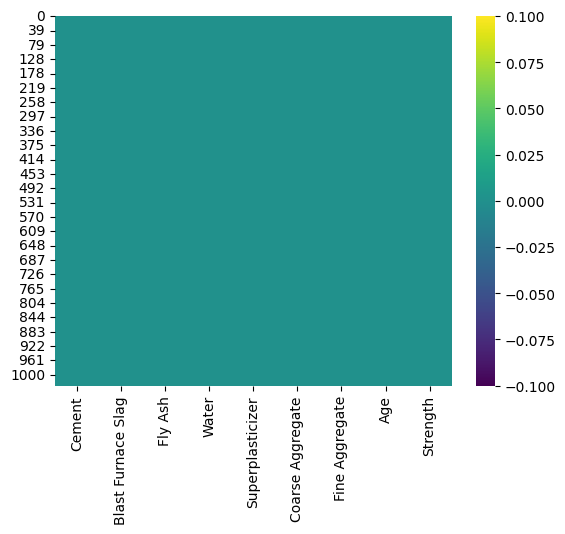

In [ ]:
#check if there are null values, and discard null values
sns.heatmap(concrete_data.isnull(),cmap='viridis')

In [ ]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

#### Splitting data into predictors/features and target labels

In [ ]:
X = concrete_data.drop('Strength',axis=1)    # (features)

In [ ]:
y = concrete_data[['Strength']]       # targets

In [ ]:
# check if any of the features is non-numeric (categorical/ordinal). if found convert these to ohe or other accordingly
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5


<Axes: >

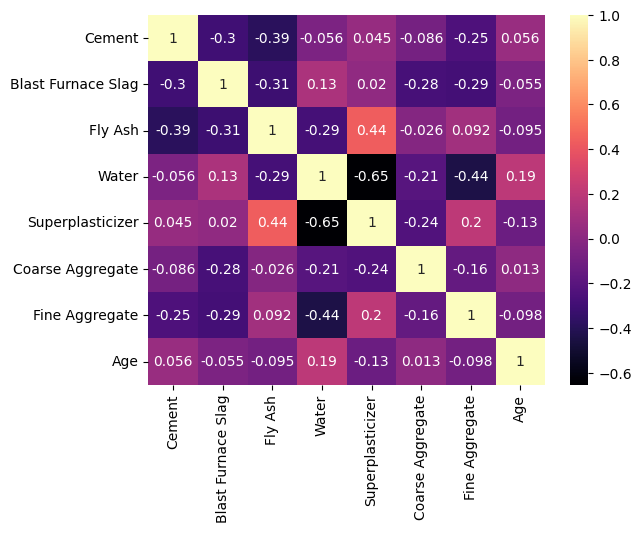

In [ ]:
sns.heatmap(X.corr(),cmap='magma',annot=True)

### Train_Test Split

In [ ]:
#Split the data into train / test 90:10 ratio. and keep test data separate for final test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

### Defining Model function

In [ ]:
# define the regression model, use of no. of layers / units is upto you.

model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                720       
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 7,281
Trainable params: 7,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#add model.compile step

optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

### A. Building a baseline model

#### Model fitting and evaluation (with non_normalized data, epochs=50) -- repeated 50 times

In [ ]:
from tensorflow.python.ops.gen_random_index_shuffle_ops import random_index_shuffle
#use model.fit with non-normalized data.

history = model.fit(X_train,
          y_train,
          epochs=50,
          validation_split=0.2,
          batch_size=10,
          verbose=0)


In [ ]:
y_pred = model.predict(X_test)


4/4 [==============================] - 0s 3ms/step


In [ ]:
# evaluate mode using test data and print accuracy
mae = round(mean_absolute_error(y_test, y_pred),2)
mse = round(mean_squared_error(y_test, y_pred),2)

print(mae)
print(mse)

6.51
70.87


## B. Modeling and Evaluation using 'normalized data'

#### Features Normalization

In [ ]:
# use normalization of the cleaned data (obtained after null checking)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### train_test split

In [ ]:
#train test split for Normalized Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

### Modeling & evaluation

In [ ]:
#create model with same no. of layers / units and see impact of normalized data on accuracy

model_b = keras.Sequential()
model_b.add(layers.Input(shape=(X_train.shape[1],)))
model_b.add(layers.Dense(80, activation='relu'))
model_b.add(layers.Dense(80, activation='relu'))
model_b.add(layers.Dense(1))



In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model_b.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

In [ ]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                720       
                                                                 
 dense_4 (Dense)             (None, 80)                6480      
                                                                 
 dense_5 (Dense)             (None, 1)                 81        
                                                                 
Total params: 7,281
Trainable params: 7,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_b = model_b.fit(X_train,
          y_train,
          epochs=50,
          validation_split=0.2,
          batch_size=10,
          verbose=0)

In [ ]:
y_pred = model_b.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [ ]:
#evaluate model and print accuracy
mae_b = round(mean_absolute_error(y_test, y_pred),2)
mse_b = round(mean_squared_error(y_test, y_pred),2)

print(mae_b)
print(mse_b)

4.58
33.17


### Comparison of loss(MSE) / Accuracy between A & B (non-normalized data vs normalized data)

In [ ]:
# print mse / accuracy

print(f'MSE of Non-Normalized Data : {mse} while MSE of Normalized Data is : {mse_b}')
print(f'MAE of Non-Normalized Data : {mae} while MAE of Normalized Data is : {mae_b}')


MSE of Non-Normalized Data : 70.87 while MSE of Normalized Data is : 33.17
MAE of Non-Normalized Data : 6.51 while MAE of Normalized Data is : 4.58


## C. Repeating B with 100 epochs

In [ ]:
#create model with same no. of layers / units and see impact of normalized data on accuracy
model_c = keras.Sequential()
model_c.add(layers.Input(shape=(X_train.shape[1],)))
model_c.add(layers.Dense(80, activation='relu'))
model_c.add(layers.Dense(80, activation='relu'))
model_c.add(layers.Dense(1))


optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model_c.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

history_c = model_c.fit(X_train,
          y_train,
          epochs=100,
          validation_split=0.2,
          batch_size=10,
          verbose=0)

In [ ]:
#evaluate and store accuracy
y_pred = model_c.predict(X_test)

mae_c = round(mean_absolute_error(y_test, y_pred),2)
mse_c = round(mean_squared_error(y_test, y_pred),2)

print(mae_c)
print(mse_c)

3/3 [==============================] - 0s 5ms/step
3.92
25.29


### Comparison of MSE between B & C (increasing epochs=50 to epochs=100)

In [ ]:
# print MSE (error) and Accuracy between B, C

# With 50 epochs
print(f'with 50 epochs, mse is {mse_b} and mae is {mae_b}')

# With 100 epochs
print(f'with 100 epochs, mse is {mse_c} and mae is {mae_c}')


with 50 epochs, mse is 33.17 and mae is 4.58
with 100 epochs, mse is 25.29 and mae is 3.92


## D. Optimized the number of hidden layers using counts 3,4,...

### Model  fitting and evaluation

In [ ]:
### with 3 hidden layers

# create model as above

model_d1 = keras.Sequential()
model_d1.add(layers.Input(shape=(X_train.shape[1],)))
model_d1.add(layers.Dense(80, activation='relu'))
model_d1.add(layers.Dense(80, activation='relu'))
model_d1.add(layers.Dense(80, activation='relu'))
model_d1.add(layers.Dense(1))


optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model_d1.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

history_d1 = model_d1.fit(X_train,
          y_train,
          epochs=100,
          validation_split=0.2,
          batch_size=10,
          verbose=0)



In [ ]:
y_pred = model_d1.predict(X_test)

mae_d1 = round(mean_absolute_error(y_test, y_pred),2)
mse_d1 = round(mean_squared_error(y_test, y_pred),2)

print(mae_d1)
print(mse_d1)

3/3 [==============================] - 0s 5ms/step
3.67
22.04


In [ ]:
### with 4 hidden layers

# create model as above

model_d2 = keras.Sequential()
model_d2.add(layers.Input(shape=(X_train.shape[1],)))
model_d2.add(layers.Dense(80, activation='relu'))
model_d2.add(layers.Dense(80, activation='relu'))
model_d2.add(layers.Dense(80, activation='relu'))
model_d2.add(layers.Dense(80, activation='relu'))
model_d2.add(layers.Dense(1))


optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model_d2.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

history_d2 = model_d2.fit(X_train,
          y_train,
          epochs=100,
          validation_split=0.2,
          batch_size=10,
          verbose=0)



In [ ]:
#repeate checking accuracy as above
y_pred = model_d2.predict(X_test)

mae_d2 = round(mean_absolute_error(y_test, y_pred),2)
mse_d2 = round(mean_squared_error(y_test, y_pred),2)

print(mae_d2)
print(mse_d2)

3/3 [==============================] - 0s 5ms/step
3.61
25.22


In [ ]:
### with 5 hidden layers

# create model as above

model_d3 = keras.Sequential()
model_d3.add(layers.Input(shape=(X_train.shape[1],)))
model_d3.add(layers.Dense(80, activation='relu'))
model_d3.add(layers.Dense(80, activation='relu'))
model_d3.add(layers.Dense(80, activation='relu'))
model_d3.add(layers.Dense(80, activation='relu'))
model_d3.add(layers.Dense(80, activation='relu'))
model_d3.add(layers.Dense(1))


optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model_d3.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

history_d3 = model_d3.fit(X_train,
          y_train,
          epochs=100,
          validation_split=0.2,
          batch_size=10,
          verbose=0)



In [ ]:
#repeate checking accuracy as above
y_pred = model_d3.predict(X_test)

mae_d3 = round(mean_absolute_error(y_test, y_pred),2)
mse_d3 = round(mean_squared_error(y_test, y_pred),2)

print(mae_d3)
print(mse_d3)

3/3 [==============================] - 0s 6ms/step
3.84
27.36


## Comparison of MSE between C & D (increasing number of hidden layers)

In [ ]:
#print mse / accuracy

print(f'mse is {mse_c} and mae is {mae_c}')

print(f'After increasing 1 hidden layer (total 3 layers), mse is {mse_d1} and mae is {mae_d1}')
print(f'After increasing 2 hidden layer (total 4 layers), mse is {mse_d2} and mae is {mae_d2}')
print(f'After increasing 3 hidden layer (total 5 layers), mse is {mse_d3} and mae is {mae_d3}')

mse is 25.29 and mae is 3.92
After increasing 1 hidden layer (total 3 layers), mse is 22.04 and mae is 3.67
After increasing 2 hidden layer (total 4 layers), mse is 25.22 and mae is 3.61
After increasing 3 hidden layer (total 5 layers), mse is 27.36 and mae is 3.84


### Conclusion

## E. Increasing the no. of units of hidden layers (16, 32,64,96, ... style)

### Model  fitting and evaluation

***From above summary, it is evident that model with 4 hidden layers is roburst as if we move to 5 hidden layers the loss will be increasing. Hence, we will continue with using 4 hidden layers***

In [ ]:
### With neurons as 16

# create model as above

model_e_16 = keras.Sequential()
model_e_16.add(layers.Input(shape=(X_train.shape[1],)))
model_e_16.add(layers.Dense(16, activation='relu'))
model_e_16.add(layers.Dense(16, activation='relu'))
model_e_16.add(layers.Dense(16, activation='relu'))
model_e_16.add(layers.Dense(16, activation='relu'))
model_e_16.add(layers.Dense(1))


optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model_e_16.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

history_e_16 = model_e_16.fit(X_train,
          y_train,
          epochs=100,
          validation_split=0.2,
          batch_size=10,
          verbose=0)

In [ ]:
#repeat checking accuracy as above

y_pred = model_e_16.predict(X_test)

mae_e_16 = round(mean_absolute_error(y_test, y_pred),2)
mse_e_16 = round(mean_squared_error(y_test, y_pred),2)

print(mae_e_16)
print(mse_e_16)

3/3 [==============================] - 0s 4ms/step
4.41
31.59


In [ ]:
### With neurons as 32

# create model as above

model_e_32 = keras.Sequential()
model_e_32.add(layers.Input(shape=(X_train.shape[1],)))
model_e_32.add(layers.Dense(32, activation='relu'))
model_e_32.add(layers.Dense(32, activation='relu'))
model_e_32.add(layers.Dense(32, activation='relu'))
model_e_32.add(layers.Dense(32, activation='relu'))
model_e_32.add(layers.Dense(1))


optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model_e_32.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

history_e_32 = model_e_32.fit(X_train,
          y_train,
          epochs=100,
          validation_split=0.2,
          batch_size=10,
          verbose=0)

In [ ]:
#repeat checking accuracy as above

y_pred = model_e_32.predict(X_test)

mae_e_32 = round(mean_absolute_error(y_test, y_pred),2)
mse_e_32 = round(mean_squared_error(y_test, y_pred),2)

print(mae_e_32)
print(mse_e_32)

3/3 [==============================] - 0s 6ms/step
3.37
21.85


In [ ]:
### With neurons as 64

# create model as above

model_e_64 = keras.Sequential()
model_e_64.add(layers.Input(shape=(X_train.shape[1],)))
model_e_64.add(layers.Dense(64, activation='relu'))
model_e_64.add(layers.Dense(64, activation='relu'))
model_e_64.add(layers.Dense(64, activation='relu'))
model_e_64.add(layers.Dense(64, activation='relu'))
model_e_64.add(layers.Dense(1))


optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model_e_64.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

history_e_64 = model_e_64.fit(X_train,
          y_train,
          epochs=100,
          validation_split=0.2,
          batch_size=10,
          verbose=0)

In [ ]:
#repeat checking accuracy as above

y_pred = model_e_64.predict(X_test)

mae_e_64 = round(mean_absolute_error(y_test, y_pred),2)
mse_e_64 = round(mean_squared_error(y_test, y_pred),2)

print(mae_e_64)
print(mse_e_64)

3/3 [==============================] - 0s 5ms/step
3.82
24.36


In [ ]:
### With neurons as 96

# create model as above

model_e_96 = keras.Sequential()
model_e_96.add(layers.Input(shape=(X_train.shape[1],)))
model_e_96.add(layers.Dense(96, activation='relu'))
model_e_96.add(layers.Dense(96, activation='relu'))
model_e_96.add(layers.Dense(96, activation='relu'))
model_e_96.add(layers.Dense(96, activation='relu'))
model_e_96.add(layers.Dense(1))


optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model_e_96.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

history_e_96 = model_e_96.fit(X_train,
          y_train,
          epochs=100,
          validation_split=0.2,
          batch_size=10,
          verbose=0)

In [ ]:
#repeat checking accuracy as above

y_pred = model_e_96.predict(X_test)

mae_e_96 = round(mean_absolute_error(y_test, y_pred),2)
mse_e_96 = round(mean_squared_error(y_test, y_pred),2)

print(mae_e_96)
print(mse_e_96)

3/3 [==============================] - 0s 4ms/step
3.98
25.96


## Comparison of MSE between C & D (increasing number of hidden layers)

* model : initial model with 2 hidden layers, 50 epochs using non-normalized data (mae,mse) - history

* model_b : model with 2 hidden layers, 50 epochs using normalized data (mae_b,mse_b) - history_b

* model_c : model with 2 hidden layers, 100 epochs using normalized data (mae_c,mse_c) - history_c

* model_d1 : model with 3 hidden layers, 100 epochs using normalized data (mae_d1,mse_d1) - history_d1

* model_d2 : model with 4 hidden layers, 100 epochs using normalized data (mae_d2,mse_d2) - history_d2

* model_d3 : model with 5 hidden layers, 100 epochs using normalized data (mae_d3,mse_d3) - history_d3

* model_e_16 : model with 4 hidden layers, 100 epochs using normalized data, 16 neurons in each layer (mae_e_16,mse_e_16) - history_e_16

* model_e_32 : model with 4 hidden layers, 100 epochs using normalized data, 32 neurons in each layer (mae_e_32,mse_e_32) - history_e_32

* model_e_64 : model with 4 hidden layers, 100 epochs using normalized data, 64 neurons in each layer (mae_e_64,mse_e_64) - history_e_64

* model_e_96 : model with 4 hidden layers, 100 epochs using normalized data, 96 neurons in each layer (mae_e_96,mse_e_96) - history_e_96

In [ ]:
#print mse / accuracy

results = {
    'epochs':[50,50,100,100,100,100,100,100,100,100],
    'hidden_layers':[2,2,2,3,4,5,4,4,4,4],
    'neurons':['80,80','80,80','80,80','80,80,80','80,80,80,80','80,80,80,80,80','16,16,16,16','32,32,32,32','64,64,64,64','96,96,96,96'],
    'mse':[mse,mse_b,mse_c,mse_d1,mse_d2,mse_d3,mse_e_16,mse_e_32,mse_e_64,mse_e_96],
    'mae':[mae,mae_b,mae_c,mae_d1,mae_d2,mae_d3,mae_e_16,mae_e_32,mae_e_64,mae_e_96]
        }
results = pd.DataFrame(results)
results

,epochs,hidden_layers,neurons,mse,mae
0,50,2,"80,80",70.87,6.51
1,50,2,"80,80",33.17,4.58
2,100,2,"80,80",25.29,3.92
3,100,3,"80,80,80",22.04,3.67
4,100,4,"80,80,80,80",25.22,3.61
5,100,5,"80,80,80,80,80",27.36,3.84
6,100,4,"16,16,16,16",31.59,4.41
7,100,4,"32,32,32,32",21.85,3.37
8,100,4,"64,64,64,64",24.36,3.82
9,100,4,"96,96,96,96",25.96,3.98


In [ ]:
normalization_effect = {
    'type':['Normalized','Non-normalized'],
    'mse': [mse_b,mse],
    'mae': [mae_b,mae]
}

normalization_effect = pd.DataFrame(normalization_effect)
normalization_effect

,type,mse,mae
0,Normalized,33.17,4.58
1,Non-normalized,70.87,6.51


In [ ]:
min_mae_record = results.loc[results['mae'].idxmin()]
min_mae_record

epochs                   100
hidden_layers              4
neurons          32,32,32,32
mse                    21.85
mae                     3.37
Name: 7, dtype: object

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

<ipython-input-79-6aa071ec6d88>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')


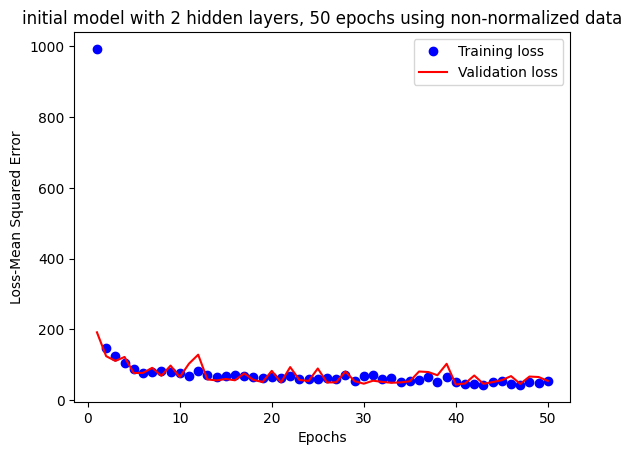

<ipython-input-79-6aa071ec6d88>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')


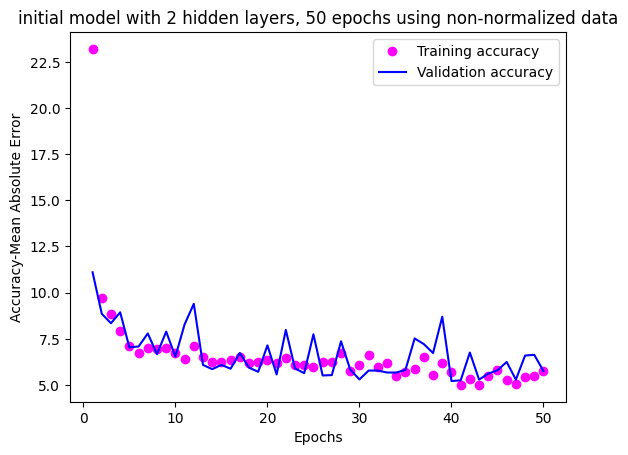

In [ ]:
#plots of loss / accuracy (as in chapter 4 taught) using history dictionary keys.


history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')
plt.title("initial model with 2 hidden layers, 50 epochs using non-normalized data")
plt.xlabel("Epochs")
plt.ylabel("Loss-Mean Squared Error")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["mean_absolute_error"]
val_acc = history_dict["val_mean_absolute_error"]
plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("initial model with 2 hidden layers, 50 epochs using non-normalized data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy-Mean Absolute Error")
plt.legend()
plt.show()


<ipython-input-80-769becba1c5e>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')


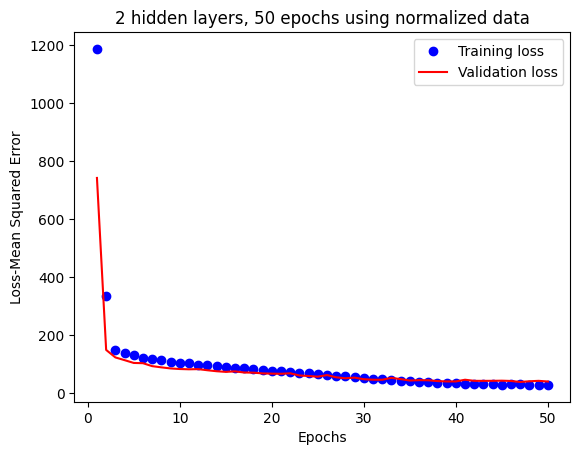

<ipython-input-80-769becba1c5e>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')


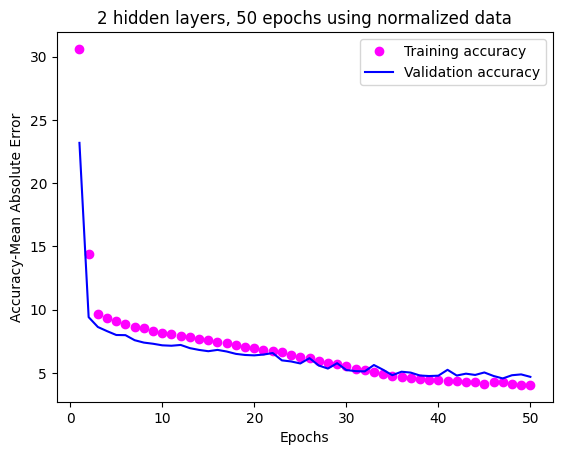

In [ ]:
history_dict = history_b.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')
plt.title("2 hidden layers, 50 epochs using normalized data")
plt.xlabel("Epochs")
plt.ylabel("Loss-Mean Squared Error")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["mean_absolute_error"]
val_acc = history_dict["val_mean_absolute_error"]
plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("2 hidden layers, 50 epochs using normalized data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy-Mean Absolute Error")
plt.legend()
plt.show()

<ipython-input-81-bbc2ff776ff8>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')


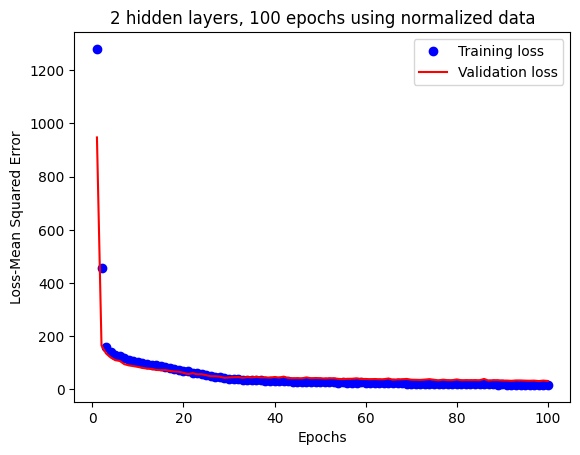

<ipython-input-81-bbc2ff776ff8>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')


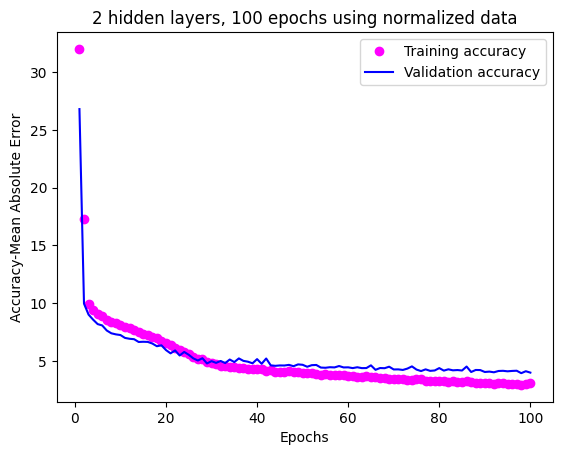

In [ ]:
history_dict = history_c.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')
plt.title("2 hidden layers, 100 epochs using normalized data")
plt.xlabel("Epochs")
plt.ylabel("Loss-Mean Squared Error")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["mean_absolute_error"]
val_acc = history_dict["val_mean_absolute_error"]
plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("2 hidden layers, 100 epochs using normalized data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy-Mean Absolute Error")
plt.legend()
plt.show()

<ipython-input-82-b55c591f464a>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')


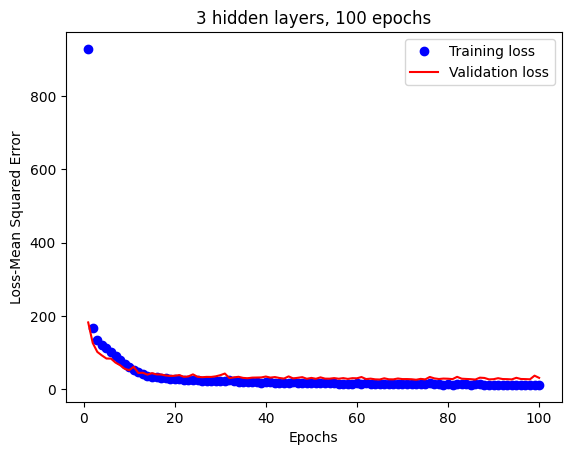

<ipython-input-82-b55c591f464a>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')


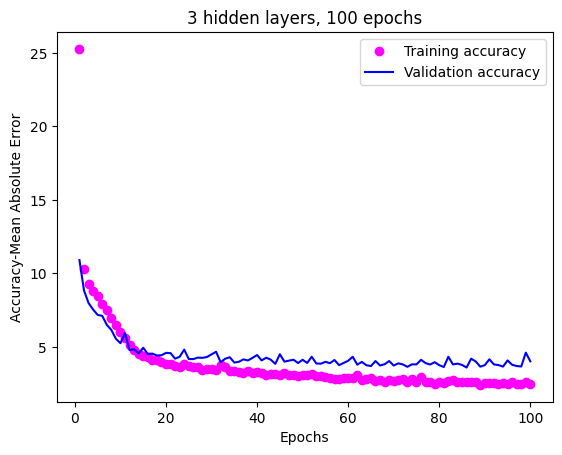

In [ ]:
history_dict = history_d1.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')
plt.title("3 hidden layers, 100 epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss-Mean Squared Error")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["mean_absolute_error"]
val_acc = history_dict["val_mean_absolute_error"]
plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("3 hidden layers, 100 epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy-Mean Absolute Error")
plt.legend()
plt.show()

<ipython-input-83-6e9d6d209967>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')


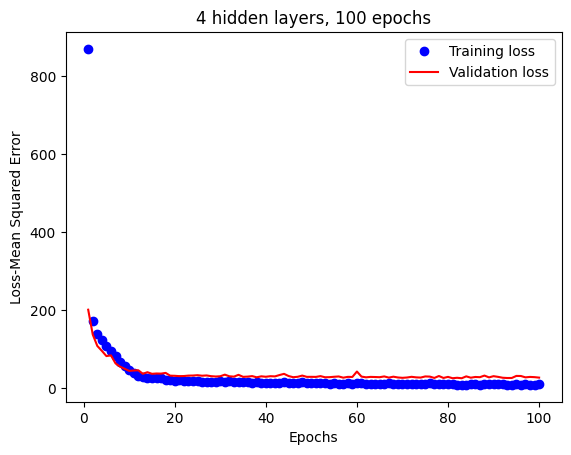

<ipython-input-83-6e9d6d209967>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')


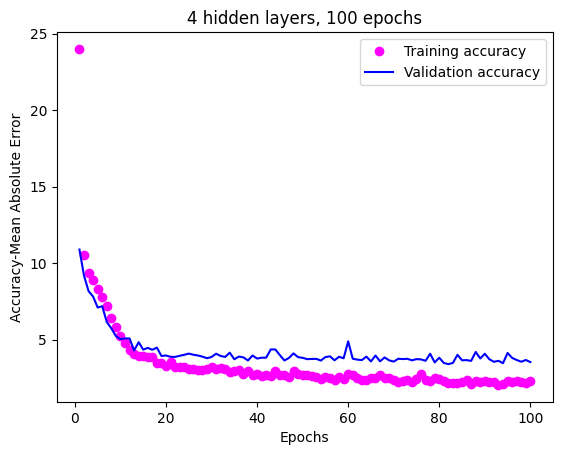

In [ ]:
history_dict = history_d2.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')
plt.title("4 hidden layers, 100 epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss-Mean Squared Error")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["mean_absolute_error"]
val_acc = history_dict["val_mean_absolute_error"]
plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("4 hidden layers, 100 epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy-Mean Absolute Error")
plt.legend()
plt.show()

<ipython-input-84-1a0ec20cdb7a>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')


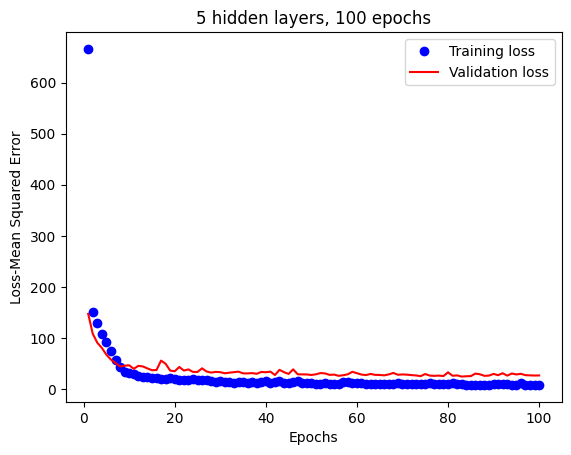

<ipython-input-84-1a0ec20cdb7a>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')


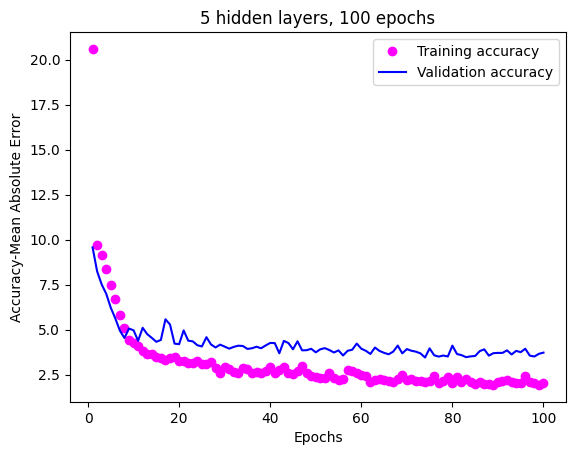

In [ ]:
history_dict = history_d3.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')
plt.title("5 hidden layers, 100 epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss-Mean Squared Error")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["mean_absolute_error"]
val_acc = history_dict["val_mean_absolute_error"]
plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("5 hidden layers, 100 epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy-Mean Absolute Error")
plt.legend()
plt.show()

<ipython-input-85-5fbec84cf32e>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')


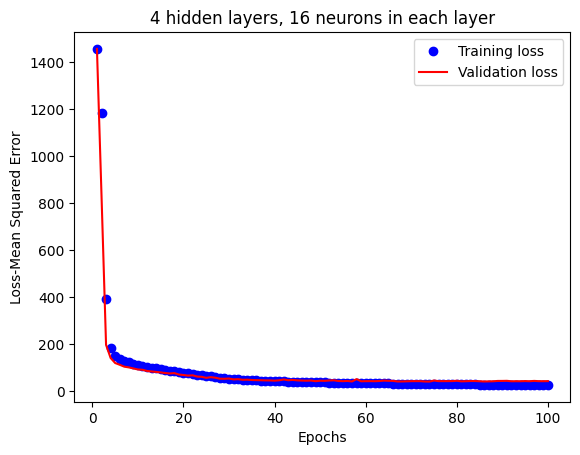

<ipython-input-85-5fbec84cf32e>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')


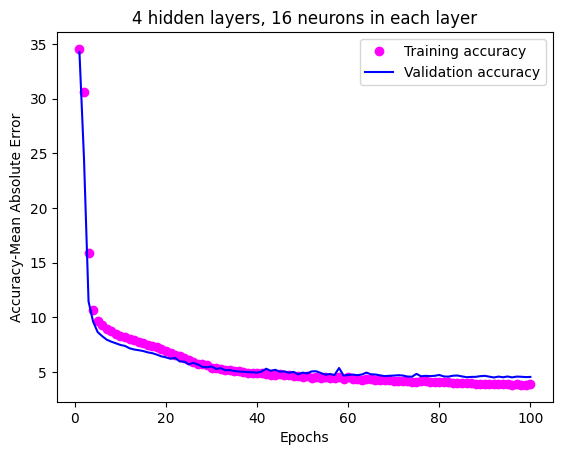

In [ ]:
history_dict = history_e_16.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')
plt.title("4 hidden layers, 16 neurons in each layer")
plt.xlabel("Epochs")
plt.ylabel("Loss-Mean Squared Error")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["mean_absolute_error"]
val_acc = history_dict["val_mean_absolute_error"]
plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("4 hidden layers, 16 neurons in each layer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy-Mean Absolute Error")
plt.legend()
plt.show()

<ipython-input-86-9cce1433c3fc>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')


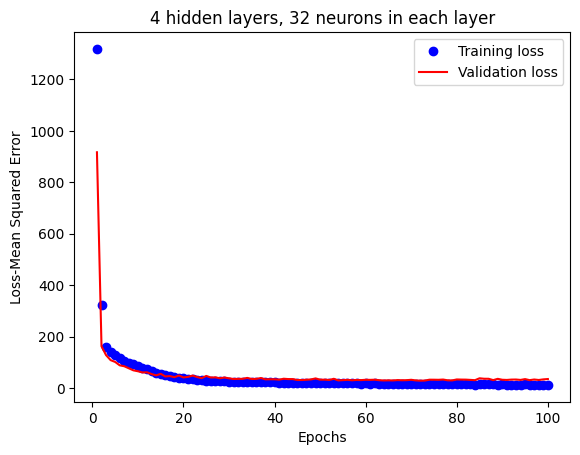

<ipython-input-86-9cce1433c3fc>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')


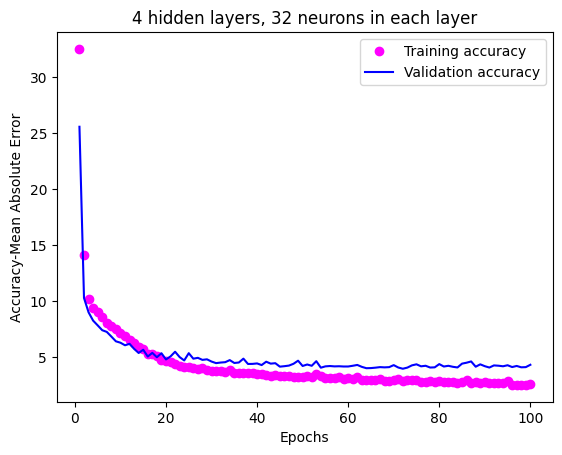

In [ ]:
history_dict = history_e_32.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')
plt.title("4 hidden layers, 32 neurons in each layer")
plt.xlabel("Epochs")
plt.ylabel("Loss-Mean Squared Error")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["mean_absolute_error"]
val_acc = history_dict["val_mean_absolute_error"]
plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("4 hidden layers, 32 neurons in each layer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy-Mean Absolute Error")
plt.legend()
plt.show()

<ipython-input-87-6dbf44fb26b0>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')


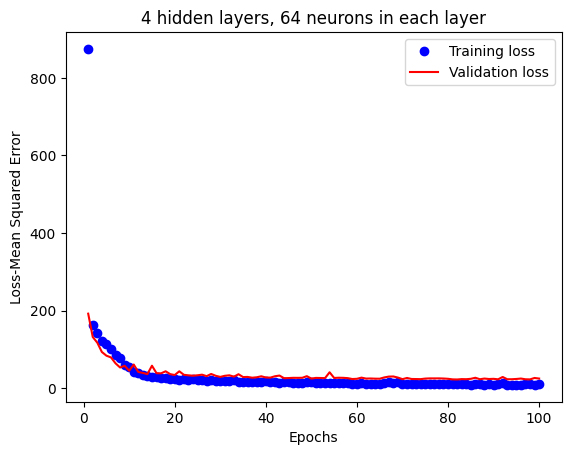

<ipython-input-87-6dbf44fb26b0>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')


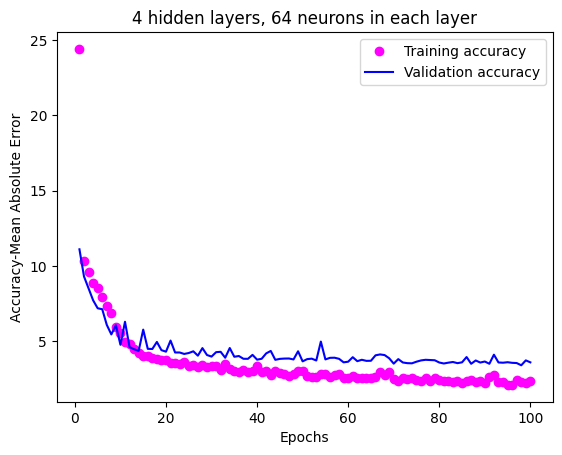

In [ ]:
history_dict = history_e_64.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')
plt.title("4 hidden layers, 64 neurons in each layer")
plt.xlabel("Epochs")
plt.ylabel("Loss-Mean Squared Error")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["mean_absolute_error"]
val_acc = history_dict["val_mean_absolute_error"]
plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("4 hidden layers, 64 neurons in each layer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy-Mean Absolute Error")
plt.legend()
plt.show()

<ipython-input-88-b2fa5d00aac4>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')


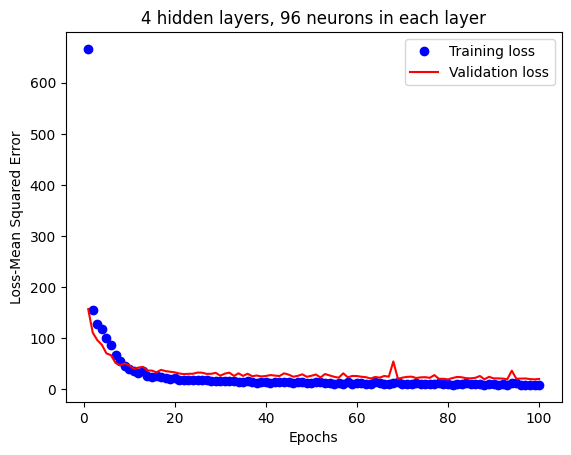

<ipython-input-88-b2fa5d00aac4>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')


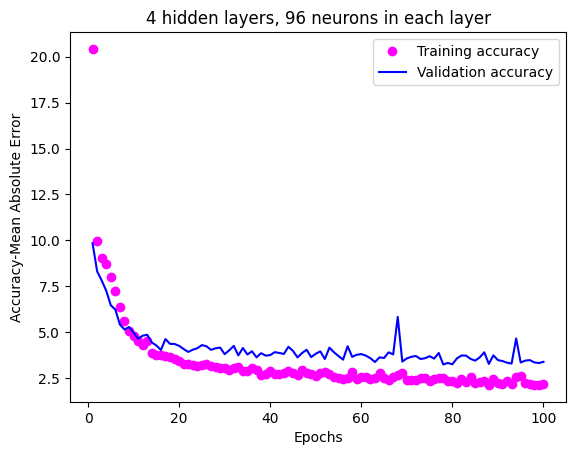

In [ ]:
history_dict = history_e_96.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss",color='red')
plt.title("4 hidden layers, 96 neurons in each layer")
plt.xlabel("Epochs")
plt.ylabel("Loss-Mean Squared Error")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["mean_absolute_error"]
val_acc = history_dict["val_mean_absolute_error"]
plt.plot(epochs, acc, "bo", label="Training accuracy",color='magenta')
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("4 hidden layers, 96 neurons in each layer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy-Mean Absolute Error")
plt.legend()
plt.show()

In [ ]:
# write what you saw when using non-normalized vs normalized data, increased epochs, layers and units.|


results

,epochs,hidden_layers,neurons,mse,mae
0,50,2,"80,80",70.87,6.51
1,50,2,"80,80",33.17,4.58
2,100,2,"80,80",25.29,3.92
3,100,3,"80,80,80",22.04,3.67
4,100,4,"80,80,80,80",25.22,3.61
5,100,5,"80,80,80,80,80",27.36,3.84
6,100,4,"16,16,16,16",31.59,4.41
7,100,4,"32,32,32,32",21.85,3.37
8,100,4,"64,64,64,64",24.36,3.82
9,100,4,"96,96,96,96",25.96,3.98


In [ ]:
normalization_effect

,type,mse,mae
0,Normalized,33.17,4.58
1,Non-normalized,70.87,6.51


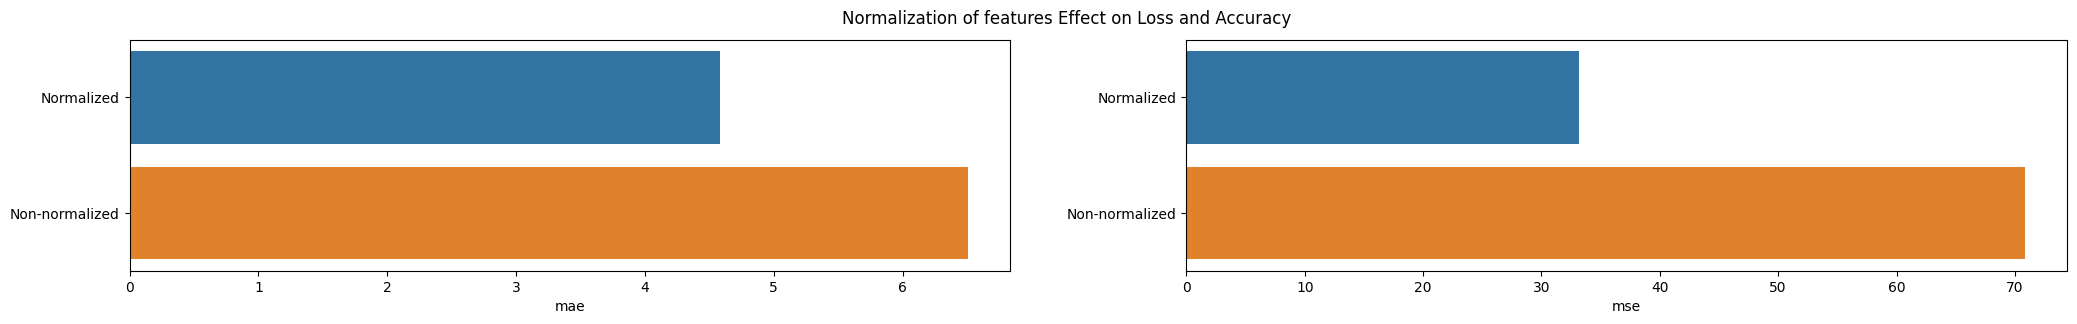

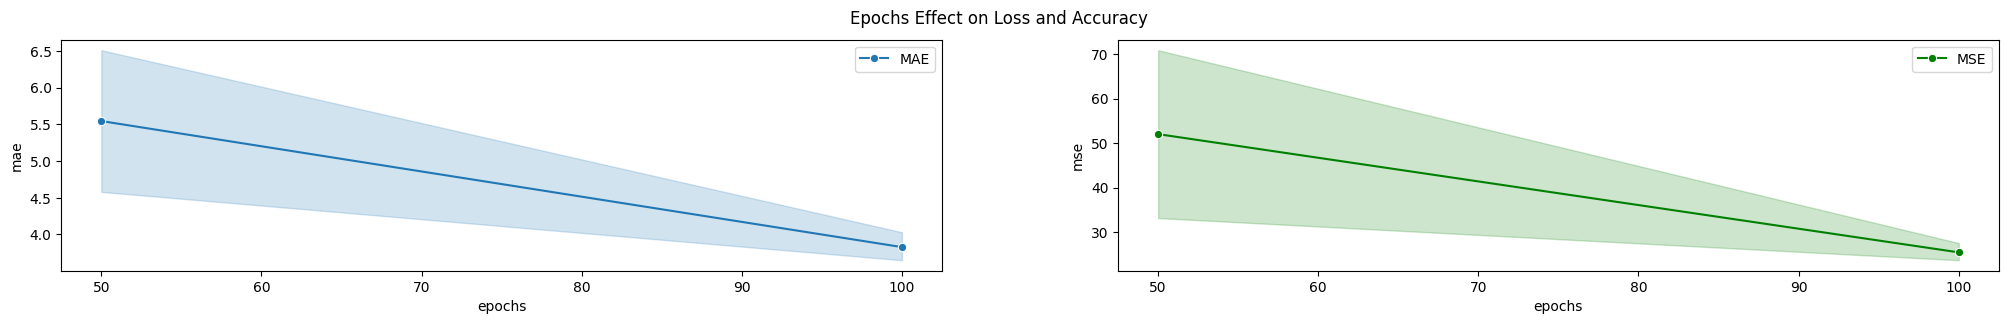

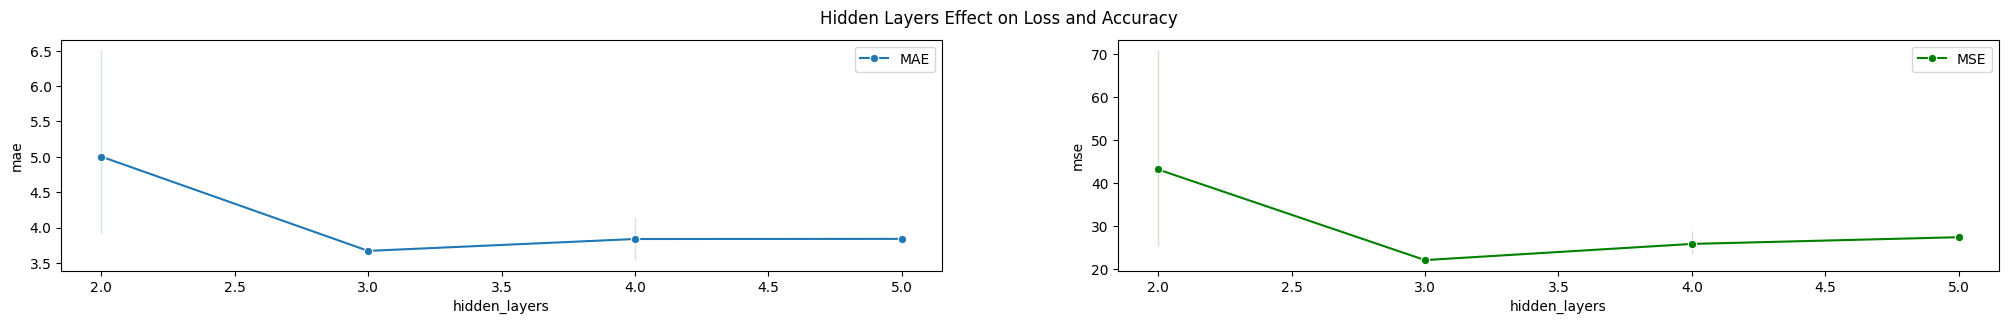

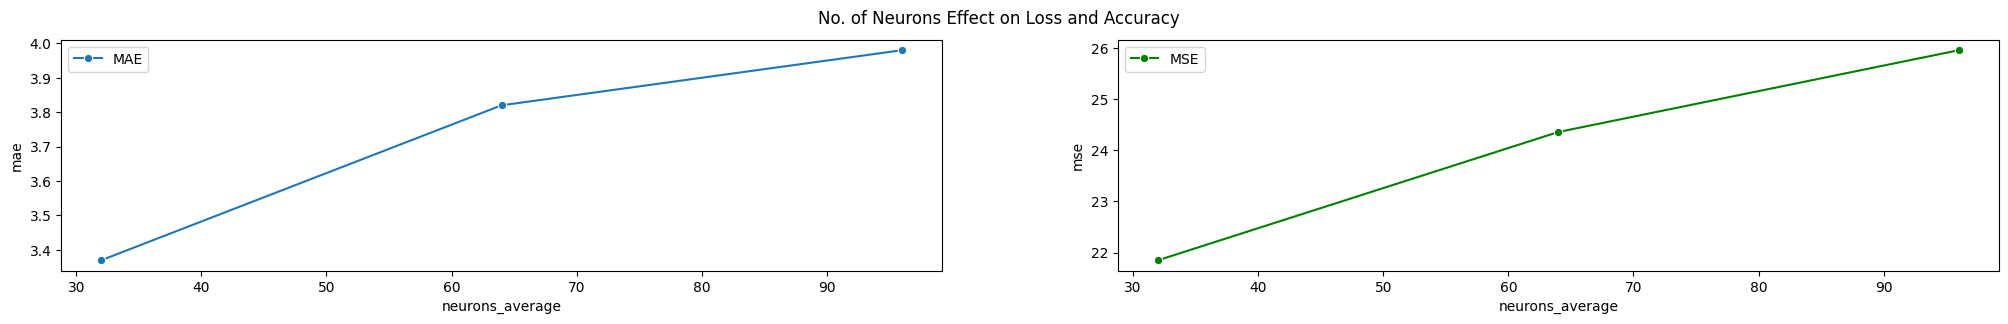

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 3))
fig.suptitle('Normalization of features Effect on Loss and Accuracy')
sns.barplot(data=normalization_effect, x='mae', y='type', ax=axes[0])
sns.barplot(data=normalization_effect, x='mse', y='type', ax=axes[1])
axes[0].set_ylabel('')
axes[1].set_ylabel('')


fig, axes = plt.subplots(1, 2, figsize=(25, 3))
fig.suptitle('Epochs Effect on Loss and Accuracy')
sns.lineplot(x="epochs", y="mae", data=results, label="MAE", marker="o", ax=axes[0])
sns.lineplot(x="epochs", y="mse", data=results, label="MSE", marker="o", ax=axes[1], color='green')

fig, axes = plt.subplots(1, 2, figsize=(25, 3))
fig.suptitle('Hidden Layers Effect on Loss and Accuracy')
sns.lineplot(x="hidden_layers", y="mae", data=results, label="MAE", marker="o", ax=axes[0])
sns.lineplot(x="hidden_layers", y="mse", data=results, label="MSE", marker="o", ax=axes[1], color='green')

fig, axes = plt.subplots(1, 2, figsize=(25, 3))
results['neurons_list'] = results['neurons'].apply(lambda x: [int(neuron) for neuron in x.split(',')])
results['neurons_average'] = results['neurons_list'].apply(lambda x: sum(x) / len(x))
fig.suptitle('No. of Neurons Effect on Loss and Accuracy')
sns.lineplot(x="neurons_average", y="mae", data=results[7:], label="MAE", marker="o", ax=axes[0])
sns.lineplot(x="neurons_average", y="mse", data=results[7:], label="MSE", marker="o", ax=axes[1], color='green')

plt.show()

### It is therefore evident that;
#### -normalization the data reduces MSE and MAE
#### -increasing the number of epochs reduces MSE and MAE
#### -increasing the number of layers reduces MSE and MAE
#### -in our case, increasing the number of units increase MSE and MAE (but please note that different scenarios applied while increasing the neurons)

In [ ]:
results

,epochs,hidden_layers,neurons,mse,mae,neurons_list,neurons_average
0,50,2,"80,80",70.87,6.51,"[80, 80]",80.0
1,50,2,"80,80",33.17,4.58,"[80, 80]",80.0
2,100,2,"80,80",25.29,3.92,"[80, 80]",80.0
3,100,3,"80,80,80",22.04,3.67,"[80, 80, 80]",80.0
4,100,4,"80,80,80,80",25.22,3.61,"[80, 80, 80, 80]",80.0
5,100,5,"80,80,80,80,80",27.36,3.84,"[80, 80, 80, 80, 80]",80.0
6,100,4,"16,16,16,16",31.59,4.41,"[16, 16, 16, 16]",16.0
7,100,4,"32,32,32,32",21.85,3.37,"[32, 32, 32, 32]",32.0
8,100,4,"64,64,64,64",24.36,3.82,"[64, 64, 64, 64]",64.0
9,100,4,"96,96,96,96",25.96,3.98,"[96, 96, 96, 96]",96.0


1. You can use model name as modelA, modelB etc. for sections A,B,....to avoid error.
2. MSE is mean squared error normally used in regression problems

3/3 [==============================] - 0s 4ms/step


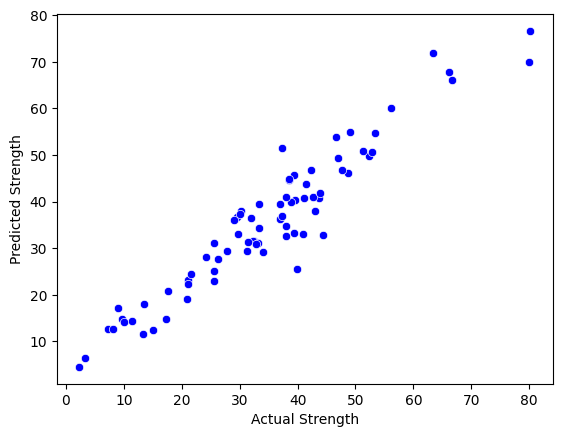

In [ ]:
actual = y_test[:76]
predict = model_e_64.predict(X_test)

predicted = predict[:76]
sns.scatterplot(x=actual['Strength'], y=predicted.ravel(),color='blue')
plt.ylabel('Predicted Strength')
plt.xlabel('Actual Strength')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install nbconvert


In [ ]:
!apt-get install texlive-xetex


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-ja

In [ ]:
from nbconvert import PDFExporter
import nbformat

# Open the notebook file
notebook_file = '/content/drive/MyDrive/Assignment - 1 Regression - Week 4.ipynb'
with open(notebook_file, 'r', encoding='utf-8') as f:
    notebook_content = nbformat.read(f, as_version=4)

# Initialize PDF export
pdf_exporter = PDFExporter()
pdf_data, resources = pdf_exporter.from_notebook_node(notebook_content)

# Save the PDF
pdf_file_path = '/content/drive/MyDrive/Assignment - 1 Regression - Week 4 (Ali Affan Yaqoob).pdf'
with open(pdf_file_path, 'wb') as f:
    f.write(pdf_data)
